# LetsGrowMore Beginner Level Task: Iris Flowers Classification ML Project 

# Author : AVIRUP MAZUMDER

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pandas as pd

In [117]:
# iris = load_iris()
iris=pd.read_csv("Iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [118]:
iris.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [119]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Knowing missing value

In [120]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualising the sepal and petal dimensions

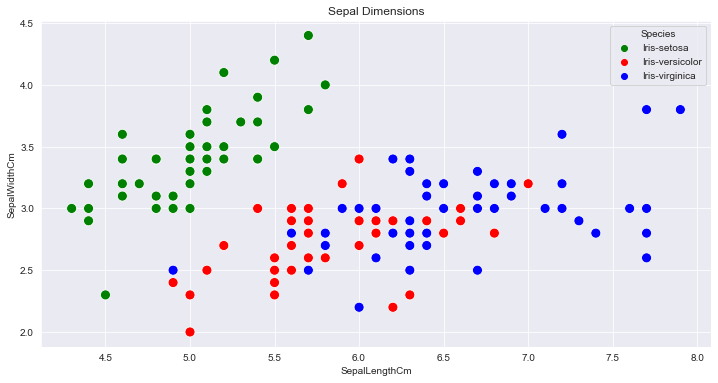

In [121]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x=iris["SepalLengthCm"],y=iris["SepalWidthCm"],hue=iris["Species"],palette=["green","red","blue"],s=100);

# Analysing the correlation between feature and target

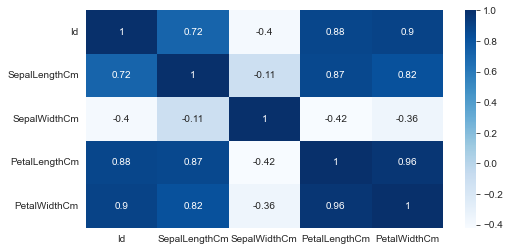

In [122]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(),annot=True,cmap='Blues');

In [123]:
X=iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=iris[["Species"]]

print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


# Spliting the datasets

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [125]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Applying the Logistic Regression

In [126]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\aviru\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Predictions

In [127]:
y_pred = model.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


# Print Confusion Matrix and Classification Report and Model Accuracy

In [128]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [129]:
print(model.score(X_test,y_test)*100)

97.36842105263158


In [130]:
print(accuracy_score(y_test,y_pred)*100)

97.36842105263158


In [131]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Predictions on Custom Data

In [132]:
X_new = [[5.1,2.5,3.7,1.3]]
print(model.predict(X_new))

['Iris-virginica']


# THANK YOU